In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

datadir = "/mnt/c/Users/maita.schade/Nextcloud/Documents/Work/Gap_Map/out/"
scopes = ["all","fv"]
levels = ["gem", "kre","lan"]
years = ["2020","2021"]

In [2]:
dirs = {y:datadir+y+"/210721_" for y in years}
gdfs = {y:{
            level:gpd.read_file(dirpath+level+".stops.4326.geojson") for level in levels
            } for (y,dirpath) in dirs.items()}

{level:gdfs for level in levels}

{'gem': {'2020': {'gem':             AGS             Raumeinheit     EWZ     KFL      SFL       n.fv  \
   0       1001000        Flensburg, Stadt   90164   53.02  27.5704   9.270950   
   1       1002000  Kiel, Landeshauptstadt  246794  118.65  64.0710  16.980447   
   2       1003000      Lübeck, Hansestadt  216530  214.19  79.2503   5.391061   
   3       1004000       Neumünster, Stadt   80196   71.66  35.8300  17.460894   
   4       1051001              Albersdorf    3708   17.12   3.2528   0.000000   
   ...         ...                     ...     ...     ...      ...        ...   
   11002  16077044             Starkenberg    1888   26.42   3.1704   0.000000   
   11003  16077047              Thonhausen     525    9.42   0.9420   0.000000   
   11004  16077048                  Treben    1175   10.00   1.6000   0.000000   
   11005  16077049            Vollmershain     311    5.06   0.3036   0.000000   
   11006  16077052           Windischleuba    1911   20.73   2.4876   0.0000

count    401.000000
mean       1.375755
std        3.374620
min       -0.962611
25%       -0.172038
50%        0.613194
75%        1.957151
max       47.817147
Name: n.all_diff, dtype: float64

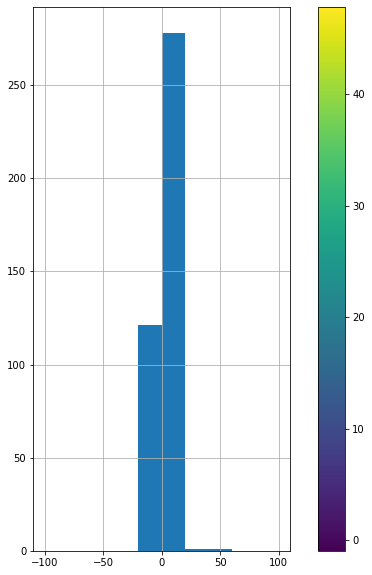

In [3]:
gem_20_gdf= gdfs["2020"]["kre"]
gem_21_gdf= gdfs["2021"]["kre"]
gem_21_gdf.columns
gem_20_gdf.merge(gem_21_gdf.drop("geometry", axis=1), how="right", on="AGS")


def ndiff(df1, df2, idcols, func = lambda a,b: b-a):
    func = np.vectorize(func)
    ncols = [col for col in df1.columns if (not (col in idcols) and col in df2.columns and df1[col].dtype=="float64")]
    merge_df = df1.merge(df2.drop(["geometry"], axis=1), on=idcols)
    diff_df = pd.DataFrame({col+"_diff":func(merge_df[col+"_x"],merge_df[col+"_y"]) for col in ncols})
    diff_df[idcols] = merge_df[idcols]
    diff_gdf = df1.drop(ncols, axis=1).merge(diff_df, on=idcols)
    return(diff_gdf)
    
#diff_gdf = ndiff(gem_20_gdf,gem_21_gdf,"AGS")
diff_gdf = ndiff(gem_20_gdf,gem_21_gdf,"AGS", func = lambda a,b: (b-a)/a if a>0 else 0 if b-a==0 else None)
diff_gdf.plot("n.all_diff", figsize = (10,10), legend = True)
diff_gdf["n.all_diff"].hist(range=(-100,100))
np.mean(diff_gdf["n.all_diff"])
np.std(diff_gdf["n.all_diff"])
np.median(diff_gdf["n.all_diff"])
diff_gdf["n.all_diff"].describe()

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(diff_gdf[["n.all_diff","AGS"]].merge(gem_20_gdf, on="AGS").loc[np.abs(diff_gdf["n.all_diff"]>4),["Raumeinheit", "n.all","n.all_diff"]].sort_values(["n.all"]))
    print(diff_gdf[["n.all_diff","AGS"]].merge(gem_20_gdf, on="AGS").loc[np.abs(diff_gdf["n.all_diff"]<-0.7),["Raumeinheit", "n.all","n.all_diff"]].sort_values("n.all"))

                      Raumeinheit          n.all  n.all_diff
369                         Börde    9373.709497   -0.876701
368             Anhalt-Bitterfeld   22171.223464   -0.962611
116              Darmstadt, Stadt   37552.703911   -0.743672
161  Ludwigshafen am Rhein, Stadt   45483.910615   -0.752059
195             Heidelberg, Stadt   46713.851955   -0.774950
162                  Mainz, Stadt   53961.865922   -0.791618
119              Wiesbaden, Stadt   87642.220670   -0.700425
63              Düsseldorf, Stadt  167515.508380   -0.730661
356                Dresden, Stadt  174773.835196   -0.722952
178              Stuttgart, Stadt  179083.075419   -0.803667
117      Frankfurt am Main, Stadt  210312.033520   -0.765397
223                München, Stadt  365890.983240   -0.798778
15                 Hamburg, Stadt  486975.374302   -0.726206
324                 Berlin, Stadt  774019.148045   -0.724362
